# Logistic Regression - Autism Spectrum Disorder Children Traits

In [8]:
import pandas as pd
import seaborn as sns

In [9]:
df = pd.read_csv('project_2_data.csv')

## Getting a general picture of the data

In [184]:
df.head()

,CASE_NO_PATIENT'S,A1,A2,A3,A4,A5,A6,A7,A8,A9,...,Global developmental delay/intellectual disability,Social/Behavioural Issues,Childhood Autism Rating Scale,Anxiety_disorder,Sex,Ethnicity,Jaundice,Family_mem_with_ASD,Who_completed_the_test,ASD_traits
0,1,0,0,0,0,0,0,1,1,0,...,Yes,Yes,1,Yes,F,middle eastern,Yes,No,Family Member,No
1,2,1,1,0,0,0,1,1,0,0,...,Yes,Yes,2,Yes,M,White European,Yes,No,Family Member,Yes
2,3,1,0,0,0,0,0,1,1,0,...,Yes,Yes,4,Yes,M,Middle Eastern,Yes,No,Family Member,Yes
3,4,1,1,1,1,1,1,1,1,1,...,Yes,Yes,2,Yes,M,Hispanic,No,No,Family Member,Yes
4,5,1,1,0,1,1,1,1,1,1,...,Yes,Yes,1,Yes,F,White European,No,No,Family Member,Yes


In [186]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1985 entries, 0 to 1984
Data columns (total 28 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   CASE_NO_PATIENT'S                                   1985 non-null   int64  
 1   A1                                                  1985 non-null   int64  
 2   A2                                                  1985 non-null   int64  
 3   A3                                                  1985 non-null   int64  
 4   A4                                                  1985 non-null   int64  
 5   A5                                                  1985 non-null   int64  
 6   A6                                                  1985 non-null   int64  
 7   A7                                                  1985 non-null   int64  
 8   A8                                                  1985 non-null   int64  
 9

## Checking for null values in the dataframe and removing them

<Axes: >

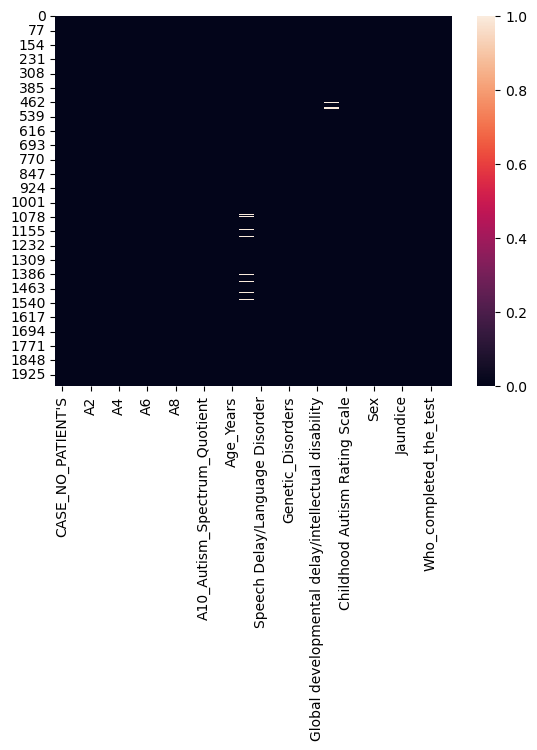

In [188]:
sns.heatmap(df.isnull())

In [190]:
df.dropna(inplace=True)

In [192]:
df.sum()

CASE_NO_PATIENT'S                                                                               1905004
A1                                                                                                  581
A2                                                                                                  465
A3                                                                                                  414
A4                                                                                                  528
A5                                                                                                  538
A6                                                                                                  589
A7                                                                                                  668
A8                                                                                                  474
A9                                                              

In [194]:
len(df)

1923

In [204]:
df.Age_Years.min()

1

In [206]:
df.Age_Years.max()

18

## Removing unnecessary columns

In [50]:
df.drop("Who_completed_the_test", "CASE_NO_PATIENT'S", axis=1, inplace=True)

## Transforming string data into dummy code

In [38]:
cols_to_encode = ['Speech Delay/Language Disorder', 'Learning disorder', 
                  'Genetic_Disorders', 'Depression', 'Global developmental delay/intellectual disability', 
                  'Social/Behavioural Issues', 'Anxiety_disorder', 'Jaundice', 'Family_mem_with_ASD', 'ASD_traits']
df[cols_to_encode] = df[cols_to_encode].replace({'Yes': 1, 'No': 0})

In [48]:
df.Sex = [1 if value == 'F' else 0 for value in df.Sex]

## Encoding labels

In [61]:
from sklearn.preprocessing import LabelEncoder

In [161]:
le = LabelEncoder()
df['Ethnicity'] = le.fit_transform(df['Ethnicity'])

## Normalizing data

In [172]:
df.describe()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10_Autism_Spectrum_Quotient,...,Depression,Global developmental delay/intellectual disability,Social/Behavioural Issues,Childhood Autism Rating Scale,Anxiety_disorder,Sex,Ethnicity,Jaundice,Family_mem_with_ASD,ASD_traits
count,1923.000000,1923.000000,1923.000000,1923.000000,1923.000000,1923.000000,1923.000000,1923.000000,1923.000000,1923.000000,...,1923.000000,1923.000000,1923.000000,1.923000e+03,1923.000000,1923.000000,1923.000000,1923.000000,1923.000000,1923.000000
mean,0.302132,0.241810,0.215289,0.274571,0.279771,0.306292,0.347374,0.246490,0.261050,0.453458,...,0.536141,0.536141,0.536141,1.773586e-16,0.534581,0.278211,7.220489,0.770671,0.314093,0.529381
std,0.459302,0.428291,0.411129,0.446414,0.449003,0.461073,0.476260,0.431079,0.439322,0.497959,...,0.498822,0.498822,0.498822,1.000260e+00,0.498932,0.448235,4.922844,0.420511,0.464274,0.499266
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,-6.977742e-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,-6.977742e-01,0.000000,0.000000,4.000000,1.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,1.000000,1.000000,-6.977742e-01,1.000000,0.000000,10.000000,1.000000,0.000000,1.000000
75%,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,2.809419e-01,1.000000,1.000000,10.000000,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,2.238374e+00,1.000000,1.000000,15.000000,1.000000,1.000000,1.000000


In [69]:
from sklearn.preprocessing import StandardScaler

In [73]:
scaler = StandardScaler()
df[['Childhood Autism Rating Scale', 'Qchat_10_Score', 'Age_Years', 'Social_Responsiveness_Scale']] = scaler.fit_transform(
    df[['Childhood Autism Rating Scale', 'Qchat_10_Score', 'Age_Years', 'Social_Responsiveness_Scale']])

In [168]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1923 entries, 0 to 1984
Data columns (total 26 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   A1                                                  1923 non-null   int64  
 1   A2                                                  1923 non-null   int64  
 2   A3                                                  1923 non-null   int64  
 3   A4                                                  1923 non-null   int64  
 4   A5                                                  1923 non-null   int64  
 5   A6                                                  1923 non-null   int64  
 6   A7                                                  1923 non-null   int64  
 7   A8                                                  1923 non-null   int64  
 8   A9                                                  1923 non-null   int64  
 9   A1

## Splitting the dataset into training and testing data

In [81]:
from sklearn.model_selection import train_test_split

In [128]:
y = df['ASD_traits'] 
X = df.drop(['ASD_traits'], axis=1)

In [130]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

## Checking for Multicollinearity

In [99]:
import numpy as np

In [137]:
condition_num = np.linalg.cond(X)
print('Condition number: ', condition_num)

Condition number:  1.2071900008257816e+16


## Creating and fitting the model

In [87]:
from sklearn.linear_model import LogisticRegression

In [132]:
lr = LogisticRegression(max_iter=500)

In [134]:
lr.fit(X_train, y_train)

LogisticRegression(max_iter=500)

## Predicting

In [143]:
y_pred = lr.predict(X_test)

In [145]:
y_pred

array([1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1,
       1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1,

## Evaluating the model

In [148]:
from sklearn.metrics import accuracy_score

In [150]:
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.96


In [152]:
from sklearn.metrics import classification_report

In [154]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.96      0.95       266
           1       0.96      0.95      0.96       311

    accuracy                           0.96       577
   macro avg       0.96      0.96      0.96       577
weighted avg       0.96      0.96      0.96       577



In [210]:
df.columns

Index(['CASE_NO_PATIENT'S', 'A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8',
       'A9', 'A10_Autism_Spectrum_Quotient', 'Social_Responsiveness_Scale',
       'Age_Years', 'Qchat_10_Score', 'Speech Delay/Language Disorder',
       'Learning disorder', 'Genetic_Disorders', 'Depression',
       'Global developmental delay/intellectual disability',
       'Social/Behavioural Issues', 'Childhood Autism Rating Scale',
       'Anxiety_disorder', 'Sex', 'Ethnicity', 'Jaundice',
       'Family_mem_with_ASD', 'Who_completed_the_test', 'ASD_traits'],
      dtype='object')

# **Summary**

### A Logistic Regression model was bilt based on the results of 1923 participant tests, between the ages of 1 and 18 years, to predict whether a person has **Autism Spectrum Disorder traits** ('ASD_traits') or not.

### The model was trained on the following predictors:
<h3 style="color:purple">'A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10_Autism_Spectrum_Quotient', 'Social_Responsiveness_Scale', 'Age_Years', 'Qchat_10_Score', 'Speech Delay/Language Disorder', 'Learning disorder', 'Genetic_Disorders', 'Depression', 'Global developmental delay/intellectual disability', 'Social/Behavioural Issues', 'Childhood Autism Rating Scale', 'Anxiety_disorder', 'Sex', 'Ethnicity', 'Jaundice', 'Family_mem_with_ASD', 'Who_completed_the_test'</h3>

### *(where A1-A10 indicate Autism Spectrum Quotient)*

### The model has an **accuracy rate of 96%**, which is high enough to be defined as trust-worthy.